In [1]:
import numpy as np
#import tensorflow as tf
import h5py
import csv
import math
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import read_excel
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D,Flatten,Bidirectional
#from keras.utils.np_utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
#from keras import regularizers
#from bnltk.stemmer import BanglaStemmer
#from bangla_stemmer.stemmer import stemmer
from gensim.models import Word2Vec
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
#import eli5
#ç
import pandas as pd
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
import glob
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from time import time 
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
df_train = pd.read_excel("3train.xlsx")
df_test= pd.read_excel("3test.xlsx")

In [3]:
df_train

,text,x,B,category
0,নিজের ইজ্জত ঢেকে রাখু,Angry,0,negative
1,ভালো লাগা কাজ করাটা স্বাভাবিক 🙂,Angry,NaN,negative
2,চুখের ভিতর কালো তিল,Angry,0,negative
3,নোবেল করোনা ভাইরাস শুধু গন্দ ছড়ায়,Angry,0,negative
4,কুত্তার ঘরে কি ঘোড়ার বাচ্চা আশা করা যায়?? মুরগ...,Angry,0,negative
...,...,...,...,...
157978,সুগাইগেছেন কেনো অাপু??,Worry,2,negative
157979,আপু ফাস্ট কমেন্ট রিপ্লে ভিডিও দিয়েন প্লিজ,Worry,4,negative
157980,আপু নামাজ রোজা করেন কেয়ামত হতে বেশি দেরি নাই ত...,Worry,1,negative
157981,শুনছি,Worry,2,negative


In [4]:
df_test

,text,x,B,category
0,মাথা নষ্ট করা মাল,Angry,3,negative
1,তার আব্বা ওও যদি আজ থাকত,Angry,0,negative
2,একেক টা আম ৫ কেজি করে হবে,Angry,0,negative
3,বাংলাদেশের নতুন নাস্তিক সে নাকি পরকাল বিশ্বাস ...,Angry,12,negative
4,হতাশ করেছে কিনা জানি না তবে এইটা দেখে খুব মজা ...,Angry,1,negative
...,...,...,...,...
39497,কইরে তুই,Worry,2,negative
39498,আগে শুনছিলাম কায়া দেখলে মায়া লাগে আর মায়া য...,Worry,1,negative
39499,তুমি নিজের হাতে ভাঙ্গ নাই তো,Worry,0,negative
39500,তোমার চোখে মায়ের পড়েছে,Worry,0,negative


In [5]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [6]:
data1 = pd.read_table("stop_words.txt")

In [7]:
data1

,words
0,অতএব
1,অথচ
2,অথবা
3,অনুযায়ী
4,অনেক
...,...
393,হাজার
394,হিসাবে
395,হৈলে
396,হোক


In [8]:
stop = data1['words'].tolist()

In [9]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [10]:
df_train['text'] = df_train.text.apply(lambda x: stopwordRemoval(str(x)))

In [11]:
df_test['text'] = df_test.text.apply(lambda x: stopwordRemoval(str(x)))

In [12]:
!pip install bangla-stemmer

In [13]:
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [14]:
df_train


,text,x,B,category
0,ইজ্জত ঢেকে রাখু,Angry,0,negative
1,ভালো লাগা করাটা স্বাভাবিক 🙂,Angry,NaN,negative
2,চুখের ভিতর কালো তিল,Angry,0,negative
3,নোবেল করোনা ভাইরাস গন্দ ছড়ায়,Angry,0,negative
4,কুত্তার ঘরে ঘোড়ার বাচ্চা আশা যায়?? মুরগী কবির ...,Angry,0,negative
...,...,...,...,...
157978,সুগাইগেছেন কেনো অাপু??,Worry,2,negative
157979,আপু ফাস্ট কমেন্ট রিপ্লে ভিডিও দিয়েন প্লিজ,Worry,4,negative
157980,আপু নামাজ রোজা কেয়ামত দেরি সবাইকে নামাজ রোজা অ...,Worry,1,negative
157981,শুনছি,Worry,2,negative


In [15]:
df_train['category'] = df_train['category'].replace({'positive': '0', 'negative': '1','Neutral': '2'})

In [16]:
df_train

,text,x,B,category
0,ইজ্জত ঢেকে রাখু,Angry,0,1
1,ভালো লাগা করাটা স্বাভাবিক 🙂,Angry,NaN,1
2,চুখের ভিতর কালো তিল,Angry,0,1
3,নোবেল করোনা ভাইরাস গন্দ ছড়ায়,Angry,0,1
4,কুত্তার ঘরে ঘোড়ার বাচ্চা আশা যায়?? মুরগী কবির ...,Angry,0,1
...,...,...,...,...
157978,সুগাইগেছেন কেনো অাপু??,Worry,2,1
157979,আপু ফাস্ট কমেন্ট রিপ্লে ভিডিও দিয়েন প্লিজ,Worry,4,1
157980,আপু নামাজ রোজা কেয়ামত দেরি সবাইকে নামাজ রোজা অ...,Worry,1,1
157981,শুনছি,Worry,2,1


In [17]:
df_test['category'] = df_test['category'].replace({'positive': '0', 'negative': '1','Neutral': '2'})

In [18]:
df_test

,text,x,B,category
0,মাথা নষ্ট মাল,Angry,3,1
1,আব্বা ওও থাকত,Angry,0,1
2,একেক টা আম ৫ কেজি,Angry,0,1
3,"বাংলাদেশের নাস্তিক পরকাল বিশ্বাস না,,,গাঞ্জা ভ...",Angry,12,1
4,হতাশ কিনা জানি এইটা মজা পেয়েছি,Angry,1,1
...,...,...,...,...
39497,কইরে তুই,Worry,2,1
39498,শুনছিলাম কায়া দেখলে মায়া লাগে মায়া কাও,Worry,1,1
39499,হাতে ভাঙ্গ,Worry,0,1
39500,চোখে মায়ের পড়েছে,Worry,0,1


In [19]:
df_train = df_train.dropna()

In [20]:
df_test = df_test.dropna()

In [21]:
#counting text length
df_train['count'] = df_train['text'].str.split().str.len()
df_test['count'] = df_test['text'].str.split().str.len()

C:\Users\ezone\AppData\Local\Temp\ipykernel_7800\3742032046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['count'] = df_train['text'].str.split().str.len()
C:\Users\ezone\AppData\Local\Temp\ipykernel_7800\3742032046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['count'] = df_test['text'].str.split().str.len()


In [22]:
df_train

,text,x,B,category,count
0,ইজ্জত ঢেকে রাখু,Angry,0,1,3
2,চুখের ভিতর কালো তিল,Angry,0,1,4
3,নোবেল করোনা ভাইরাস গন্দ ছড়ায়,Angry,0,1,5
4,কুত্তার ঘরে ঘোড়ার বাচ্চা আশা যায়?? মুরগী কবির ...,Angry,0,1,12
5,জেলা প্রশাসকের,Angry,0,1,2
...,...,...,...,...,...
157978,সুগাইগেছেন কেনো অাপু??,Worry,2,1,3
157979,আপু ফাস্ট কমেন্ট রিপ্লে ভিডিও দিয়েন প্লিজ,Worry,4,1,7
157980,আপু নামাজ রোজা কেয়ামত দেরি সবাইকে নামাজ রোজা অ...,Worry,1,1,10
157981,শুনছি,Worry,2,1,1


In [23]:
df_test

,text,x,B,category,count
0,মাথা নষ্ট মাল,Angry,3,1,3
1,আব্বা ওও থাকত,Angry,0,1,3
2,একেক টা আম ৫ কেজি,Angry,0,1,5
3,"বাংলাদেশের নাস্তিক পরকাল বিশ্বাস না,,,গাঞ্জা ভ...",Angry,12,1,7
4,হতাশ কিনা জানি এইটা মজা পেয়েছি,Angry,1,1,6
...,...,...,...,...,...
39497,কইরে তুই,Worry,2,1,2
39498,শুনছিলাম কায়া দেখলে মায়া লাগে মায়া কাও,Worry,1,1,7
39499,হাতে ভাঙ্গ,Worry,0,1,2
39500,চোখে মায়ের পড়েছে,Worry,0,1,3


In [24]:
# Remove the text with words less than 200
# df_train= df_train.loc[df_train['count']>20]
# df_test= df_test.loc[df_test['count']>20]

In [25]:
df_train

,text,x,B,category,count
0,ইজ্জত ঢেকে রাখু,Angry,0,1,3
2,চুখের ভিতর কালো তিল,Angry,0,1,4
3,নোবেল করোনা ভাইরাস গন্দ ছড়ায়,Angry,0,1,5
4,কুত্তার ঘরে ঘোড়ার বাচ্চা আশা যায়?? মুরগী কবির ...,Angry,0,1,12
5,জেলা প্রশাসকের,Angry,0,1,2
...,...,...,...,...,...
157978,সুগাইগেছেন কেনো অাপু??,Worry,2,1,3
157979,আপু ফাস্ট কমেন্ট রিপ্লে ভিডিও দিয়েন প্লিজ,Worry,4,1,7
157980,আপু নামাজ রোজা কেয়ামত দেরি সবাইকে নামাজ রোজা অ...,Worry,1,1,10
157981,শুনছি,Worry,2,1,1


In [26]:
df_test

,text,x,B,category,count
0,মাথা নষ্ট মাল,Angry,3,1,3
1,আব্বা ওও থাকত,Angry,0,1,3
2,একেক টা আম ৫ কেজি,Angry,0,1,5
3,"বাংলাদেশের নাস্তিক পরকাল বিশ্বাস না,,,গাঞ্জা ভ...",Angry,12,1,7
4,হতাশ কিনা জানি এইটা মজা পেয়েছি,Angry,1,1,6
...,...,...,...,...,...
39497,কইরে তুই,Worry,2,1,2
39498,শুনছিলাম কায়া দেখলে মায়া লাগে মায়া কাও,Worry,1,1,7
39499,হাতে ভাঙ্গ,Worry,0,1,2
39500,চোখে মায়ের পড়েছে,Worry,0,1,3


In [27]:
dataset = pd.concat([df_train, df_test], ignore_index=True)

In [28]:
dataset

,text,x,B,category,count
0,ইজ্জত ঢেকে রাখু,Angry,0,1,3
1,চুখের ভিতর কালো তিল,Angry,0,1,4
2,নোবেল করোনা ভাইরাস গন্দ ছড়ায়,Angry,0,1,5
3,কুত্তার ঘরে ঘোড়ার বাচ্চা আশা যায়?? মুরগী কবির ...,Angry,0,1,12
4,জেলা প্রশাসকের,Angry,0,1,2
...,...,...,...,...,...
196194,কইরে তুই,Worry,2,1,2
196195,শুনছিলাম কায়া দেখলে মায়া লাগে মায়া কাও,Worry,1,1,7
196196,হাতে ভাঙ্গ,Worry,0,1,2
196197,চোখে মায়ের পড়েছে,Worry,0,1,3


In [29]:
dataset.drop(columns=['count'])

,text,x,B,category
0,ইজ্জত ঢেকে রাখু,Angry,0,1
1,চুখের ভিতর কালো তিল,Angry,0,1
2,নোবেল করোনা ভাইরাস গন্দ ছড়ায়,Angry,0,1
3,কুত্তার ঘরে ঘোড়ার বাচ্চা আশা যায়?? মুরগী কবির ...,Angry,0,1
4,জেলা প্রশাসকের,Angry,0,1
...,...,...,...,...
196194,কইরে তুই,Worry,2,1
196195,শুনছিলাম কায়া দেখলে মায়া লাগে মায়া কাও,Worry,1,1
196196,হাতে ভাঙ্গ,Worry,0,1
196197,চোখে মায়ের পড়েছে,Worry,0,1


In [30]:
dataset['category'] = dataset['category'].replace({'0': 'positive', '1': 'negative','2': 'Neutral'})

Total number of articles: 196199


(array([0, 1, 2]),
 [Text(0, 0, 'positive'), Text(0, 1, 'negative'), Text(0, 2, 'Neutral')])

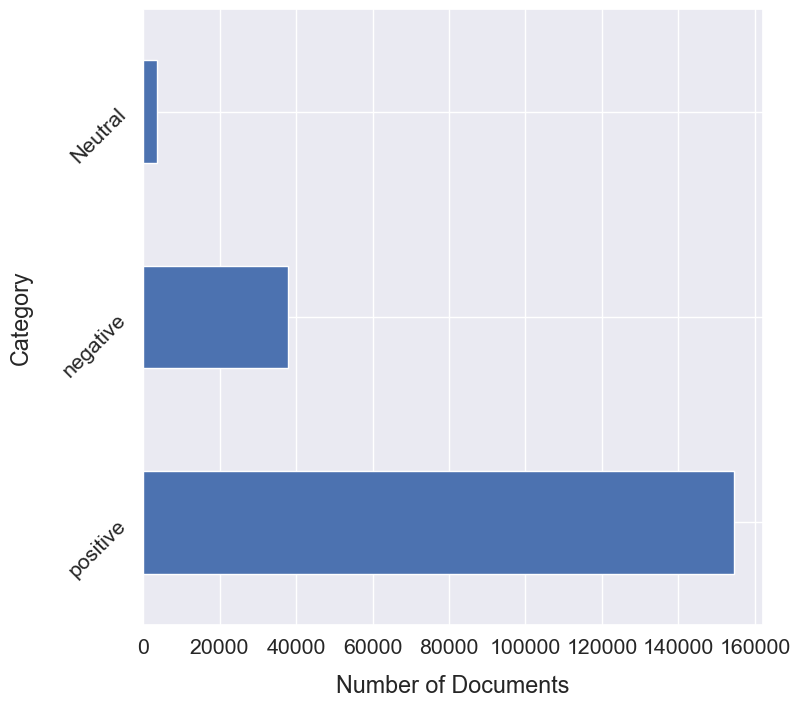

In [31]:
print(f'Total number of articles: {len(dataset)}')
sns.set(font_scale=1.4)
dataset['category'].value_counts().plot(kind='barh', figsize=(8, 8))
plt.xlabel("Number of Documents", labelpad=12)
plt.ylabel("Category", labelpad=19)
plt.yticks(rotation = 45)
# plt.title("Dataset Distribution", y=1.02)

In [32]:
#max features 5000,10000,50000,100000
text_transformer = TfidfVectorizer(ngram_range=(1, 3),lowercase=True, max_features=10000)

In [33]:
X_train_text = text_transformer.fit_transform(df_train['text'].values)

In [34]:
X_test_text = text_transformer.transform(df_test['text'].values)

In [35]:
from sklearn.ensemble import RandomForestClassifier
nb =RandomForestClassifier()

In [36]:
model=nb.fit(X_train_text, df_train['category'].values)

In [37]:
test_preds = nb.predict(X_test_text)

In [38]:
test_preds

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [39]:
test_labels=df_test['category'].values

In [40]:
test_result=accuracy_score(test_labels,test_preds)

In [41]:
precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,test_preds, average='weighted')

In [42]:
score = model.score(X_test_text,test_labels)

In [43]:
score

0.8843095274506805

In [44]:
print("Testing Accuracy: "+str(test_result))

print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))

Testing Accuracy: 0.8843095274506805
Precision :0.8798940992508588
Recall :0.8843095274506805
fscore :0.8769457168815666


In [45]:
cm = metrics.confusion_matrix(test_labels,test_preds)

In [46]:
cm_df = pd.DataFrame(cm,index = ['Positive' ,'Negative' ,'Neutral'], 
                     columns = ['Positive' ,'Negative' ,'Neutral'])

Text(0.5, 1.0, 'Accuracy Score Random Forest Classifier: 0.8843095274506805')

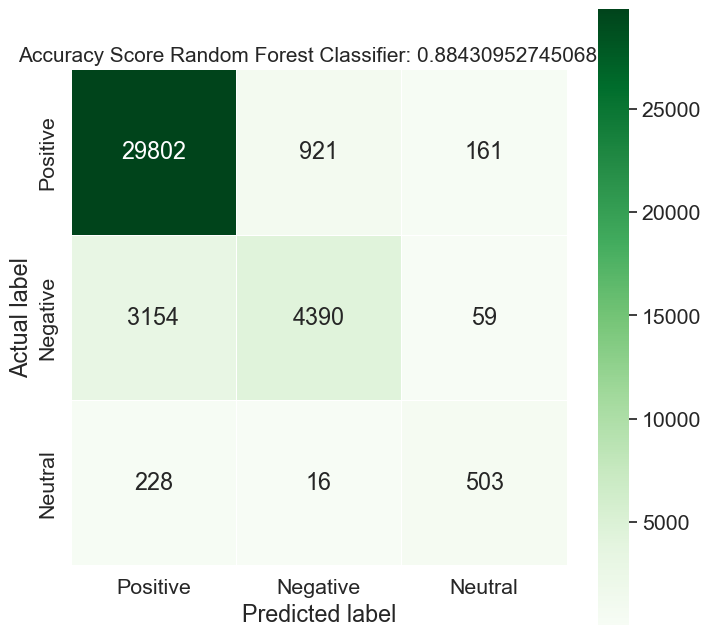

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Random Forest Classifier: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [48]:
report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = test_preds, output_dict=True)).transpose()
report = report.rename(index={'0': 'Positive', '1': 'Negative','2': 'Neutral'})

In [49]:
report

,precision,recall,f1-score,support
Positive,0.898083,0.964966,0.930324,30884.00000
Negative,0.824104,0.577404,0.679041,7603.00000
Neutral,0.695712,0.673360,0.684354,747.00000
accuracy,0.884310,0.884310,0.884310,0.88431
macro avg,0.805966,0.738576,0.764573,39234.00000
weighted avg,0.879894,0.884310,0.876946,39234.00000


In [50]:
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))

In [51]:
report

,precision,recall,f1-score,support
Positive,89.81,96.50,93.03,30884.00000
Negative,82.41,57.74,67.90,7603.00000
Neutral,69.57,67.34,68.44,747.00000
accuracy,88.43,88.43,88.43,0.88431
macro avg,80.60,73.86,76.46,39234.00000
weighted avg,87.99,88.43,87.69,39234.00000


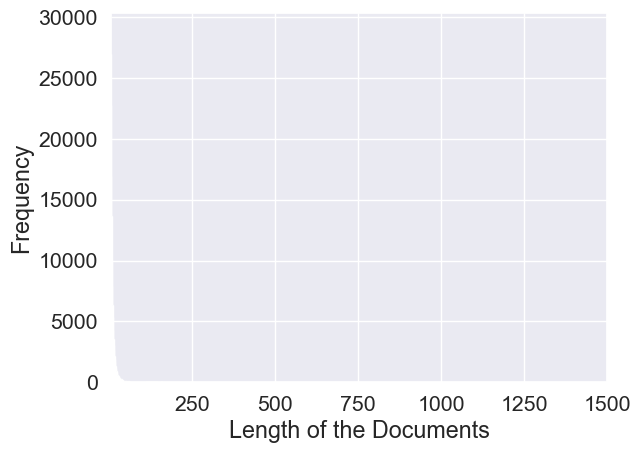

Maximum Length of an Article: 587
Minimum Length of an Article: 0
Average Length of an Article: 7.0


In [52]:
# Calculate the Review of each of the Review
dataset['Count'] = dataset.text.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.Count:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(5, 1500)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Documents')
plt.ylabel('Frequency')
# plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of an Article: {max(dataset.Count)}")
print(f"Minimum Length of an Article: {min(dataset.Count)}")
print(f"Average Length of an Article: {round(np.mean(dataset.Count),0)}")

In [53]:
import pickle

In [54]:
with open('RF_model_new', 'wb') as f:
    pickle.dump(model, f)

In [55]:
with open('RF_model_new', 'rb') as f:
    loaded_model = pickle.load(f)

Text(0.5, 1.0, 'Accuracy Score of RF Classifier: 0.8843095274506805')

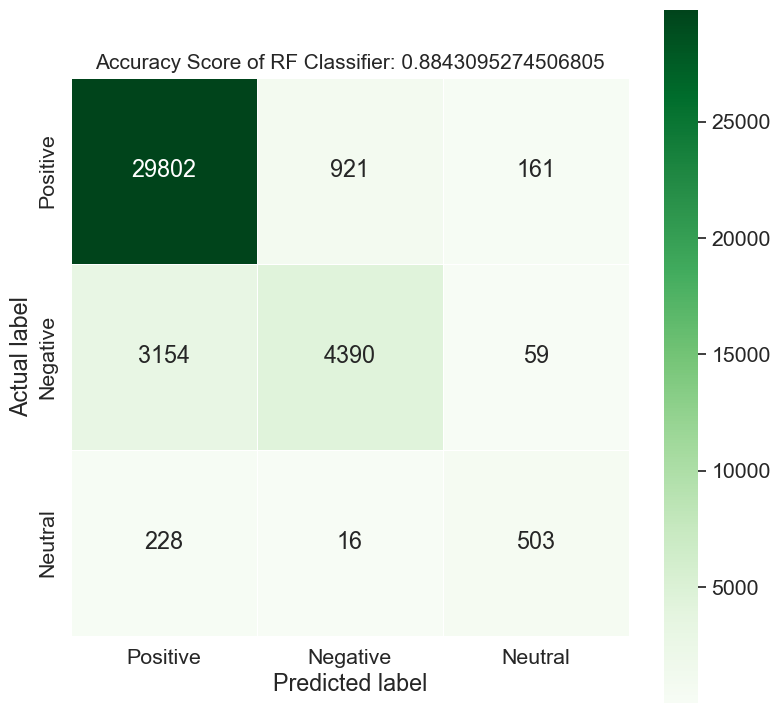

In [56]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_df, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of RF Classifier: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [57]:
!pip install yellowbrick

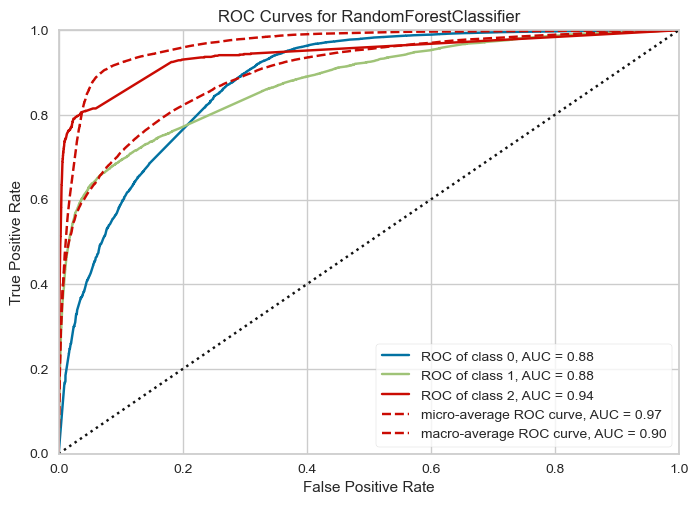

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [58]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(nb, classes=['0','1','2'])

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show()   
visualizer.fit(X_train_text, df_train['category'].values)        # Fit the training data to the visualizer
visualizer.score(X_test_text,test_labels)        # Evaluate the model on the test data
visualizer.show() 

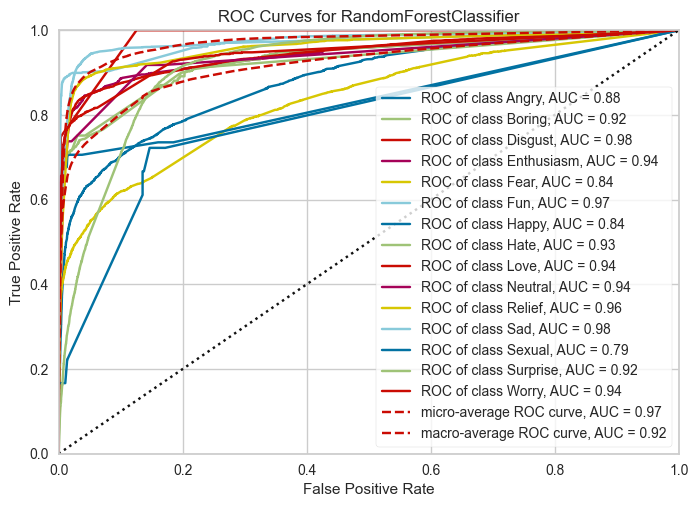

<AxesSubplot: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [115]:

from yellowbrick.classifier import ROCAUC
df_train.rename(index={'0': 'Angry', '1': 'Boring','2': 'Disgust','3': 'Enthusiasm','4': 'Fear','5': 'Fun','6': 'Happy', '7': 'Hate', '8': 'Love', '9': 'Neutral', '10': 'Relief', '11': 'Sad', '12': 'Sexual', '13': 'Surprise', '14': 'Worry'})

visualizer = ROCAUC(nb, classes=['Angry','Boring','Disgust','Enthusiasm','Fear','Fun','Happy','Hate', 'Love', 'Neutral','Relief', 'Sad', 'Sexual', 'Surprise','Worry'])

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show()   
visualizer.fit(X_train_text, df_train['category'].values)        # Fit the training data to the visualizer
visualizer.score(X_test_text,test_labels)        # Evaluate the model on the test data
visualizer.show() 

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


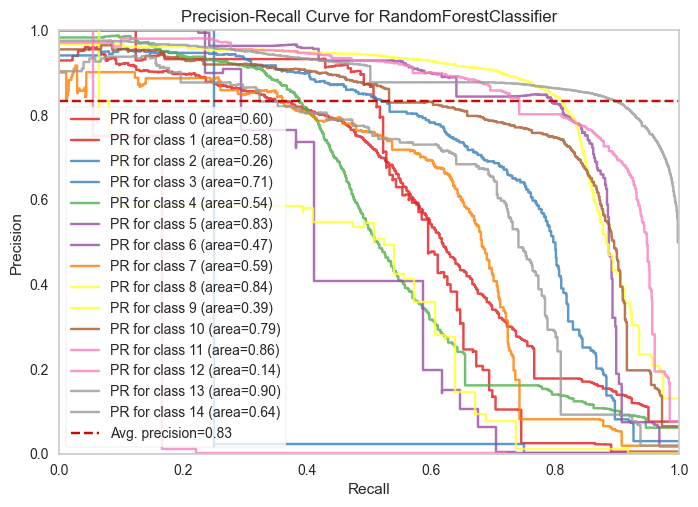

<AxesSubplot: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [116]:

from yellowbrick.classifier import PrecisionRecallCurve
df_train.rename(index={'0': 'Angry', '1': 'Boring','2': 'Disgust','3': 'Enthusiasm','4': 'Fear','5': 'Fun','6': 'Happy', '7': 'Hate', '8': 'Love', '9': 'Neutral', '10': 'Relief', '11': 'Sad', '12': 'Sexual', '13': 'Surprise', '14': 'Worry'})
visualizer =  PrecisionRecallCurve(nb,per_class=True,cmap="Set1")

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show()   
visualizer.fit(X_train_text, df_train['category'].values)        # Fit the training data to the visualizer
visualizer.score(X_test_text,test_labels)        # Evaluate the model on the test data 
visualizer.show()

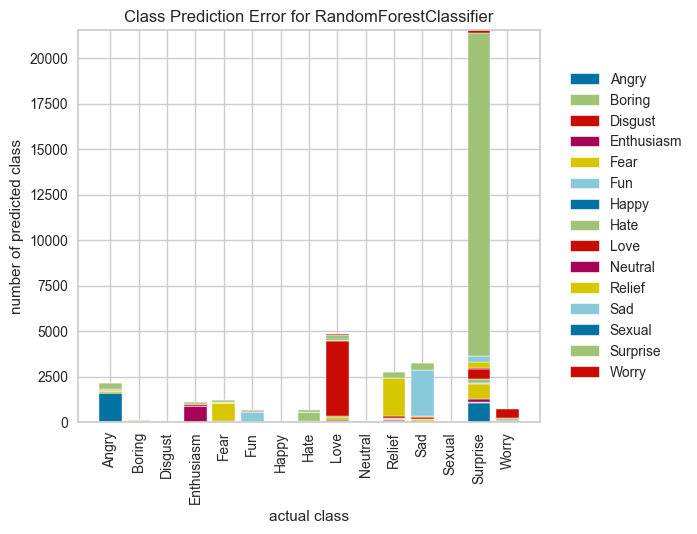

<AxesSubplot: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [117]:
from yellowbrick.classifier import ClassPredictionError
clas=['Angry','Boring','Disgust','Enthusiasm','Fear','Fun','Happy','Hate', 'Love', 'Neutral','Relief', 'Sad', 'Sexual', 'Surprise','Worry']
visualizer =  ClassPredictionError(nb,classes=clas)

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show()   
visualizer.fit(X_train_text, df_train['category'].values)        # Fit the training data to the visualizer
visualizer.score(X_test_text,test_labels)        # Evaluate the model on the test data
visualizer.show() 